# bend geometry

Calculate the resistance in a bend geometry


In [1]:
import numpy as np
import kwant
%run matplotlib_setup.ipy
from matplotlib import pyplot

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
lat = kwant.lattice.square(norbs=1)

build a bend geometry with leads

In [3]:
def build_bend(W=10, L=25, t=1):
    syst = kwant.Builder()
    syst[(lat(x, y) for x in range(L) for y in range(W))] = 4 * t
    syst[(lat(L-x-1,-y) for x in range(W) for y in range(L-W+1))] = 4*t
    syst[lat.neighbors()] = -t
    
    lx = kwant.Builder(kwant.TranslationalSymmetry([-1,0]))
    lx[(lat(0,y) for y in range(W))] = 4*t
    lx[lat.neighbors()] = -t
    
    ly = kwant.Builder(kwant.TranslationalSymmetry([0,-1]))
    ly[(lat(L-x-1,0) for x in range(W))] = 4*t
    ly[lat.neighbors()] = -t
    
    syst.attach_lead(lx)
    syst.attach_lead(ly)
    
    return syst

The convenience function `kwant.plotter.bands` is often handy to plot bandstructure.  If you need to access the actual band structure data (perhaps to plot it in a different way) you may use `kwant.physics.Bands`.

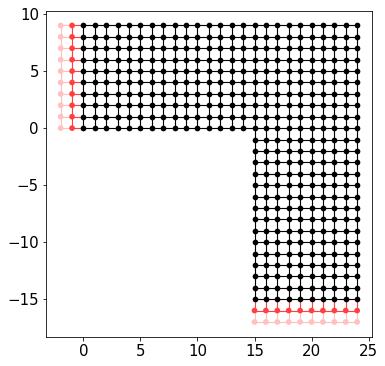

In [4]:
kwant.plot(build_bend());


## Transmission through the bend



The following function will plot transmission and reflection from lead 0 to lead 1 as a function of Fermi energy.

In [5]:
def plot_transmission(syst, energies):
    # Compute conductance
    trans = []
    refl = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        trans.append(smatrix.transmission(1, 0))
        refl.append(smatrix.transmission(0, 0))
    pyplot.plot(energies, trans, 'b.', label = 'Transmission')
    pyplot.plot(energies, refl, 'o', label = 'Reflection')
    pyplot.legend()

Let's now put the above functions to work by creating a system, plotting it, and then plotting transmission through it.  Since we have chosen the Hamiltonian of the scattering region (black dots) to be the same as in the leads, our system is still translationally invariant and there is no back-scattering: we see conductance steps that are characteristic of a clean quantum wire.  Compare the transmisison plot with the band structure plot above to verify that the steps occur whenever the Fremi energy reaches a new band.

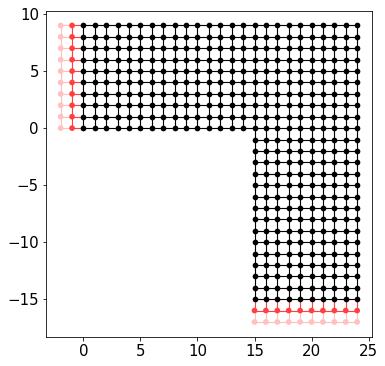

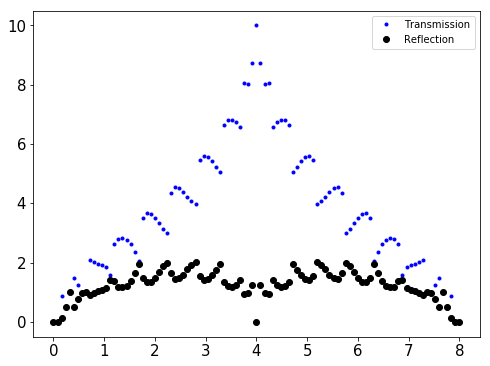

In [16]:
_wire = build_bend(10, 25)
kwant.plot(_wire)
plot_transmission(_wire.finalized(), np.linspace(0, 8, 101))


In [7]:
# plotting the wavefunction

def plot_density(syst, lead, energy):
    wrf = syst.finalized()
    wfs = kwant.wave_function(wrf, energy)
#     display('energy = '+str(energy), 'lead = '+str(lead))
    kwant.plotter.map(wrf, np.sum(abs(wfs(lead))**2, axis=0));
    
#plotting the current
def plot_current(syst, lead, energy):
    wrf = syst.finalized()
    jop = kwant.operator.Current(wrf)
    wfs = kwant.wave_function(wrf, energy)
    j = jop(np.sum(wfs(lead), axis=0))
    kwant.plotter.current(wrf, j)

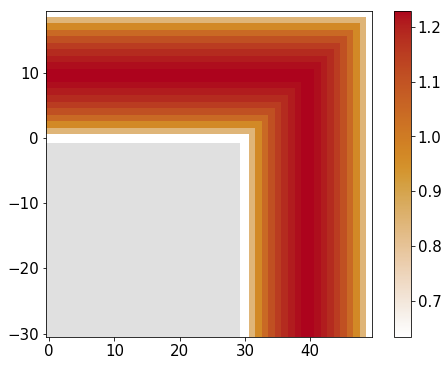

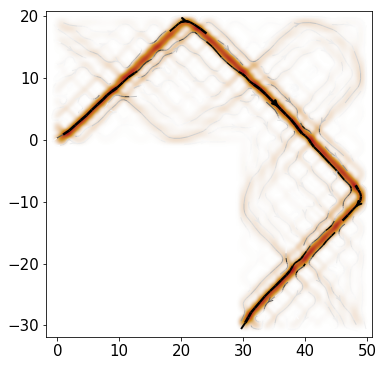

In [17]:
W=20; L=50;
lead=0; en = 4;
plot_density(build_bend(W, L), lead, en)
plot_current(build_bend(W, L), lead, en)

In [10]:
_wire = build_bend(W, L)
def pdi(lead, en):
    plot_density(_wire, lead, en)
    plot_current(_wire, lead, en)
    

interact(pdi, lead=(0,1,1), en=(0.01,5,0.01))


A Jupyter Widget

<function __main__.pdi>

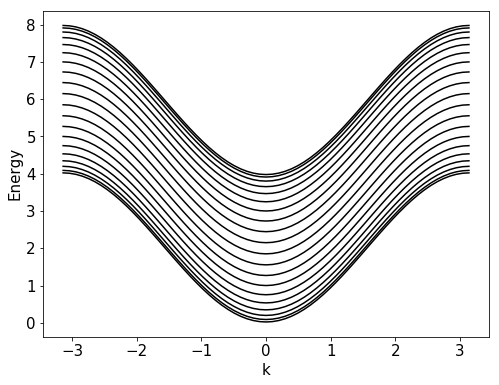

In [11]:
systf = build_bend(W, L).finalized()
kwant.plotter.bands(systf.leads[0]);